# Logistic Maps

Lars Schuster November 30 2022

The logistic map describes a certain type of function which can be described by:

$ x_{n+1} = 4rx_n(1-x_n)$

Where r and x can vary from 0 to 1.

The function log_map takes the parameters r and $x_0$ as well as the number of iterations n to compute and return an array of length n containing the x values for the n iterations.

In [10]:
import numpy as np

def log_map(r,x_0,n):
    arr = np.zeros(n)
    arr[0] = x_0

    for i in range(n-1):
        arr[i+1] = 4*r*arr[i]*(1-arr[i])

    return arr

The plot function plots the results.

In [11]:
import matplotlib.pyplot as plt

def plot(x, y,title, r, x_0):
    plt.title(title + " r = " + str(r) +" "+ r"$x_0 = $"  + str(x_0))
    plt.xlabel('iterations')
    plt.ylabel('x values')
    plt.plot(x, y)
    plt.ylim(np.min([-0.05,np.min(y)*1.05]) , np.max([np.max(y)+0.05, 1.05]))
    plt.grid()
    plt.tight_layout()
    plt.show()
    plt.close()

To show some example the maps of different r and $x_0$ values are plotted below.
$(r = 0.05, x_0 = 0.69), (r = 0.25, x_0 = 0.81), (r = 0.728, x_0 = 0.1), and (r = 0.86, x_0 = 0.05)$

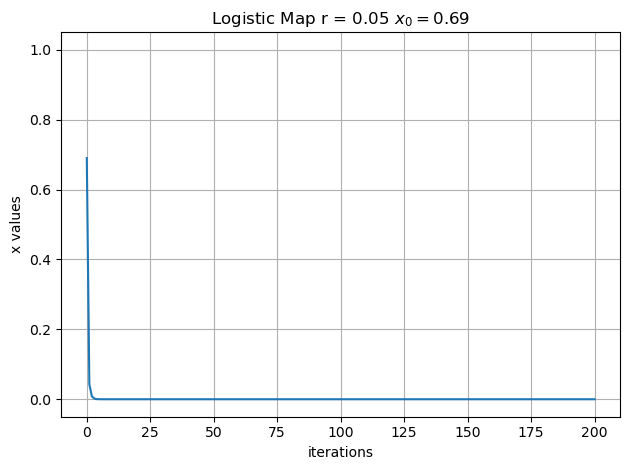

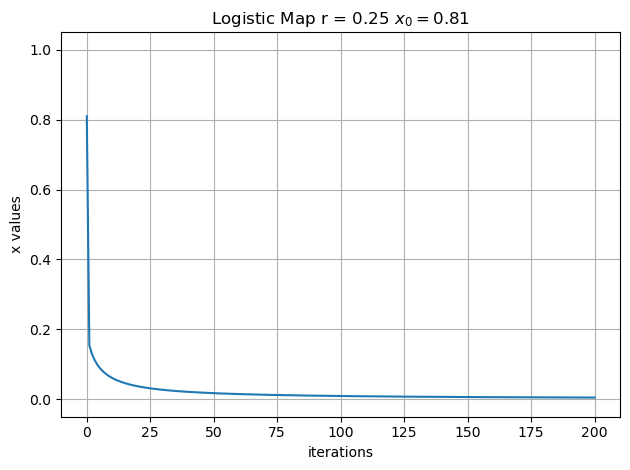

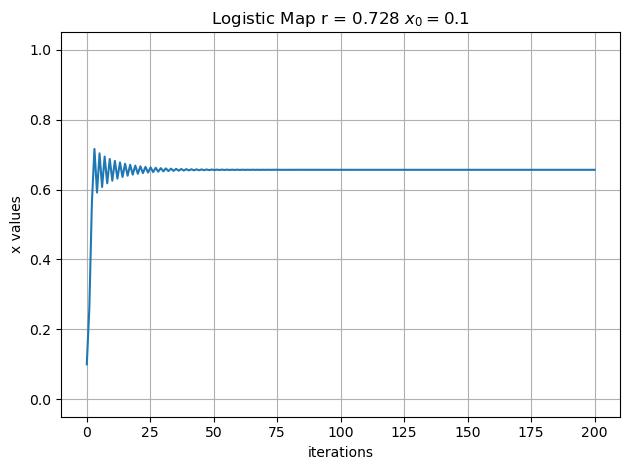

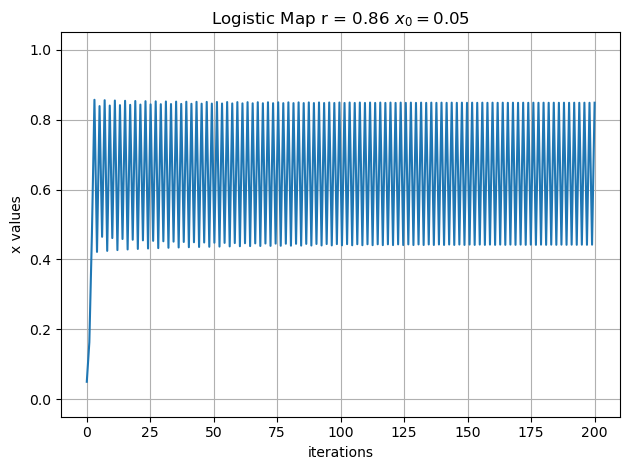

In [12]:
n = 200
r = [0.05,0.25,0.728,0.86]
x_0 = [0.69,0.81,0.1,0.05]
x = np.linspace(0, n, n)
for i in range(len(r)):
    y = log_map(r[i],x_0[i],n)
    plot(x, y,"Logistic Map", r[i], x_0[i])

The logistic map has the property that for values of r smaller than 0.25 the x value will approach 0 as n becomes larger.

For x-values between 0.25 and 0.75 the graph will approach a so called fix-value.

For values between 0.75 and approximately 0.8925 the graph will have multiple fix-values. That means it will repeat its values in a regular fashion. The length of these cycles is usually a power of 2.

Values of r that are beyond that region will cause chaotic outcomes which are largely unpredictable. A small change in the initial values will potentially cause a totally different behaviour.

There exist also other maps that have different eqations. Two examples could be:

1. $f(x) = xe^{(4r(1-x))}$

2. $f(x) = 1 - 2x^2$

The following two functions calculate these maps.

In [13]:
import math

def exp_map(r,x_0,n):
    arr = np.zeros(n)
    arr[0] = x_0

    for i in range(n-1):
        arr[i+1] =  arr[i] * np.exp(4*r*(1-arr[i]))

    return arr

def square_map(r,x_0,n):
    arr = np.zeros(n)
    arr[0] = x_0

    for i in range(n-1):
        arr[i+1] =  1 -  2 * arr[i] * arr[i]
    return arr


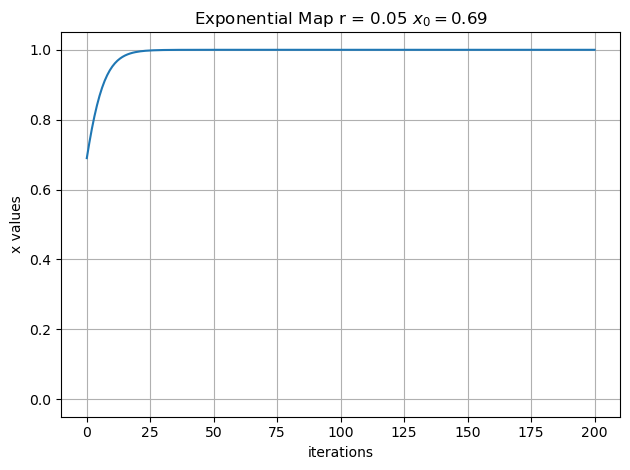

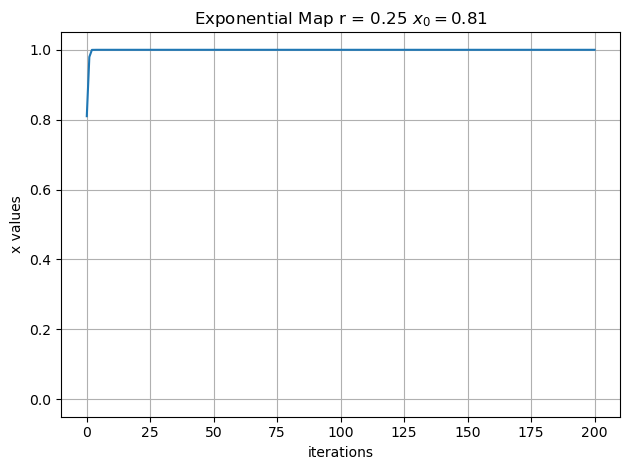

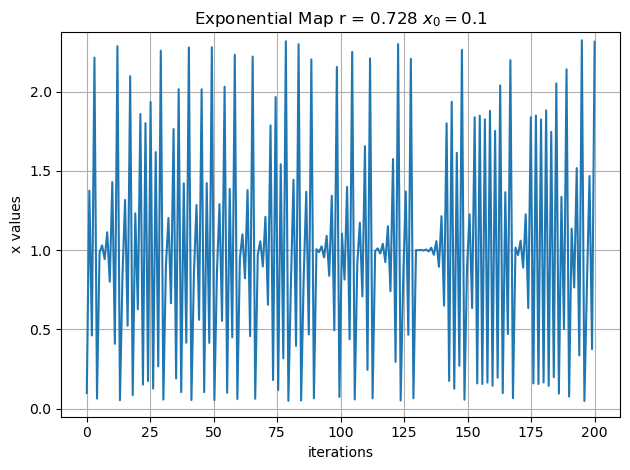

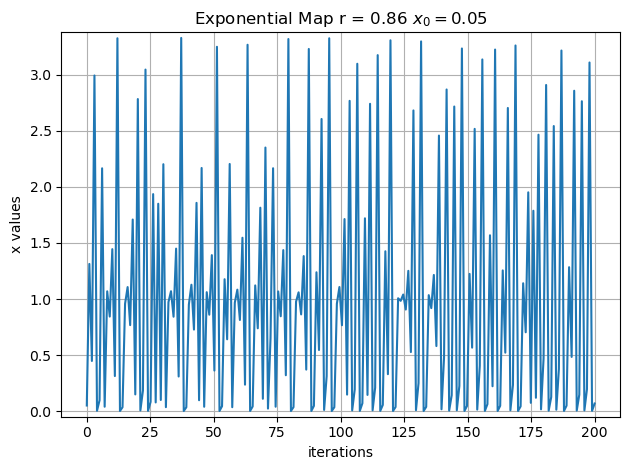

In [14]:
for i in range(len(r)):
    y = exp_map(r[i],x_0[i],n)
    plot(x, y,"Exponential Map", r[i], x_0[i])

As the logistic map this map has a fix point for r smaller than 0.25 which lies at x equal to 1. For larger values the map is more chaotic. Whenever values close to one are reached it will stay in that range because the exponent becomes 0 so the functions value is the same as before.

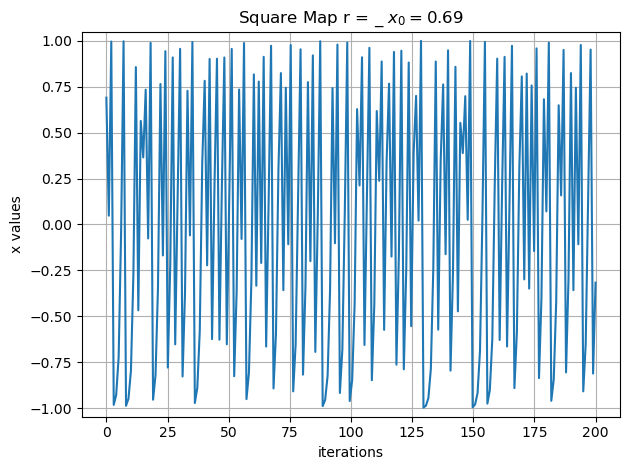

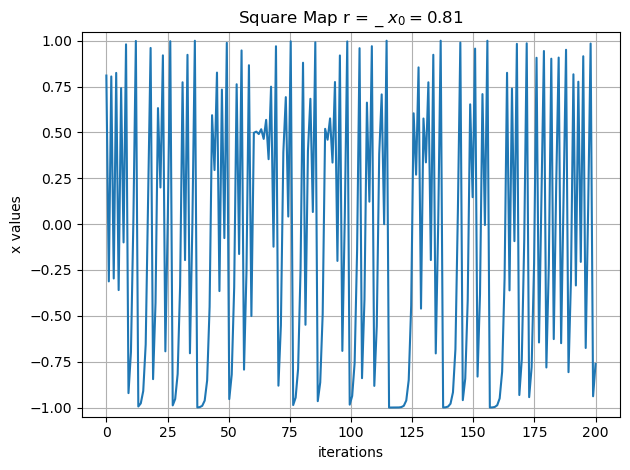

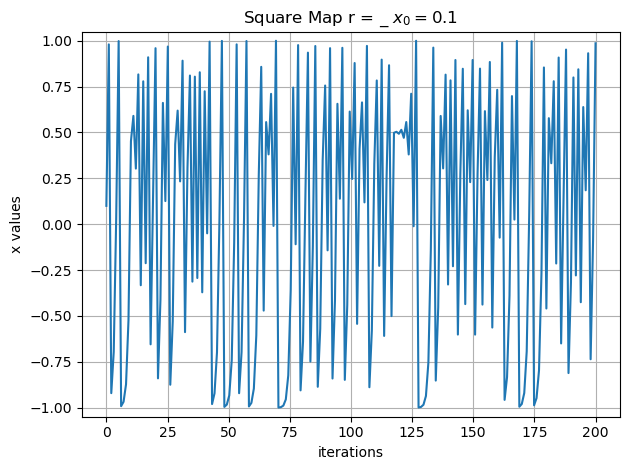

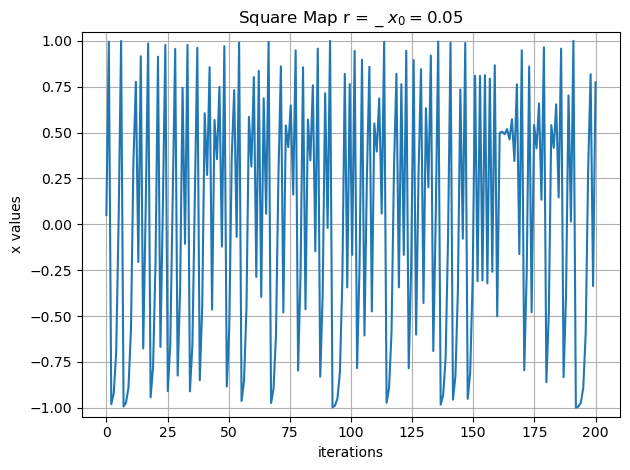

In [15]:
for i in range(len(r)):
    y = square_map(r[i],x_0[i],n)
    plot(x, y,"Square Map", "_", x_0[i])

This map is rather chaotic. Whenever values close to 0.5 are achieved it tends to stay close to this value since $f(0.5)=1- 2\cdot0.5^2 = 0.5$.

Coming back to the logistic map. 
Lets investigate more into the behaviour of the fix points of the logistic map.
To do that we will iterate over 3000 r-values in the range of  $0.25 \le 0.85$.
For each r value we will note down the fixed values in a file.

To do that the function bifucation_diagram is used. 

The arguments are the number of r values n as well as the actual values of r in an array (r).
The number of iterations of each logistic map is denoted by iterations. The value of last determines how many points at the end of each logistic map will be used to determine potential fixpoints.
The number of differen x_0 values per r value is x_range. The round parameter shows the number of decimal places that should be kept for the x-values of the fixed points.

The function iterates over different x_0 and r values and calculates the logistic maps for each of these. The values that are from iterations larger than iterations-last are saved to a data-frame.

At the end duplicates are removed from the data-frame and the key value pairs are saved to a csv file.

In [16]:
import pandas as pd

n = 3000
r = np.linspace(0.25, 1, n)

iterations = 200
last = 100

def lm(r, x):
    return 4 * r * x * (1 - x)

def bifurcation_diagram(n,r,iterations,last,x_range,round):
    results = np.zeros((1, 2))
    for elem in np.linspace(.01,.99,x_range):
        x = elem * np.ones(n)    
        for i in range(iterations):
            x = lm(r, x)
            if i >= (iterations - last):
                results = np.append(results, np.column_stack((r, np.around(x,round))), axis=0)
    df = pd.DataFrame(columns=['r', 'x'])
    df = df.append(pd.DataFrame(results, columns=[
                   'r', 'x']), ignore_index=True)
    df = df.drop_duplicates()
    df = df.drop(df.index[0])
    df.to_csv('logistic_map.csv', index=False)

bifurcation_diagram(n,r,iterations,last,10,4)

The function plot_bif is used to plot the points in the CSV-file. the parameters are the arrays of the values for r and x as well as the window to show in the polot given by xwindow and ywindow. 
The alpha parameter is used to control the dots transparency. For large windows smaller alpha values may increase readability of the plot.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bif(r, x, xwindow, ywindow,alpha):
    plt.title("Bifurcation Diagram")
    plt.xlabel('r')
    plt.ylabel('x fixed points')
    plt.scatter(r, x, c="black", s=0.5, alpha=alpha)
    plt.xlim(xwindow)
    plt.ylim(ywindow)
    plt.grid()
    plt.tight_layout()
    plt.show()
    plt.close()

df = pd.read_csv('logistic_map.csv')

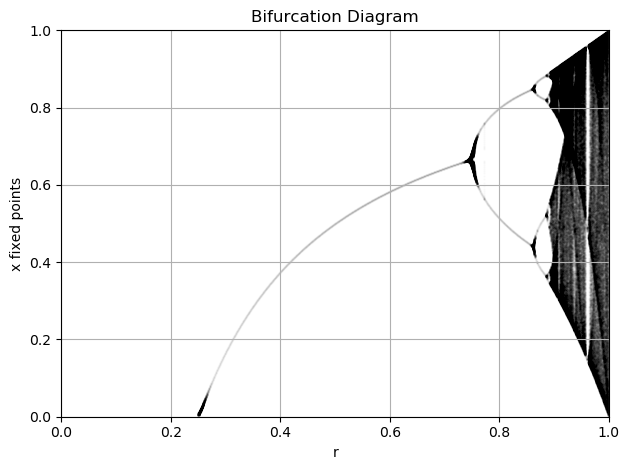

In [31]:
plot_bif(df['r'], df['x'], [0.0, 1], [0, 1], 0.015)

The earlier described behaviour of fixed values can be observed clearly. The entire bifurcation diagram shows 0 at first then there is on e fixed point from 0.25 until 0.75 and the graph splits. 

Following from there the graph splits multiple times until it start overlapping with itself and becomes more and more chaotic.

One can even see so called islands of stability in the chaotic regime where there are distinct fixed values for a short window of r-values (around 0.96)

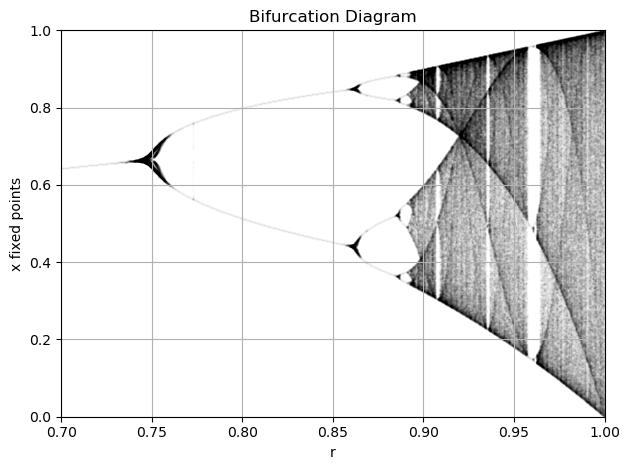

In [32]:
plot_bif(df['r'], df['x'], [0.7, 1], [0, 1], 0.015)


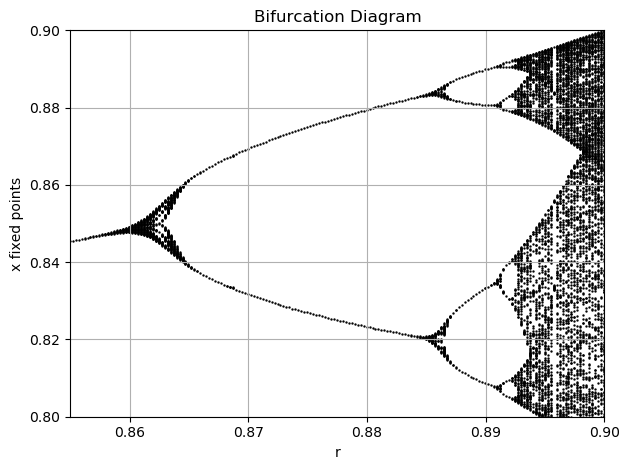

In [19]:
plot_bif(df['r'], df['x'], [0.855,.9], [0.8, .9], 1)

Zooming in the bifurcation is much more visible shwoing more and more forks of the graph

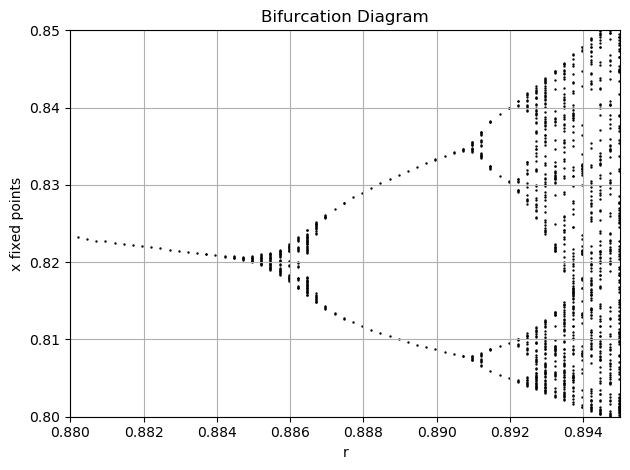

In [30]:
plot_bif(df['r'], df['x'], [0.88,.895], [0.80, .85], 1)

The complexity of this graph is quite surprising considering the simple origen of it.